# EDA
*EXPLANATORY DATA ANALYSIS*

## Imports and reading data

In [38]:
#imports
import sys
sys.path.append('..')
import importlib
import pandas as pd
import scripts.preprocess as pre

import matplotlib.pyplot as plt
import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go
plt.style.use('ggplot')

In [39]:
# reload after changing files
importlib.reload(pre)

<module 'scripts.preprocess' from '/home/cita_zane/Documents/kood_johvi/ai/kaggle-titanic/notebooks/../scripts/preprocess.py'>

In [40]:
data = pre.get_data('../data/train.csv')

## Understanding data
* dataFrame shape
* head/tail
* data types
* describe/info

In [41]:
# check first rows to get basic understanding how the data looks
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [42]:
# data shape shows how many rows and columns we have
data.shape

(891, 12)

In [43]:
# check data types and get a sense for missing values per column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [44]:
# describe can help detect if there are outliers
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Data prerocessing
* drop irrelevant columns
* identify dublicate rows
* rename columns

In [45]:
# find how many missing values there are in data set
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [46]:
# catch dublicates. empty list menas no dublicates
data.loc[data.duplicated()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [47]:
# drop columns:
#   'Embarked'  -> does not give much additional data for predicting survival probability
# data = pre.drop_columns(data)
# data.head()

## Feature understanding
* feature distribution: In case where disstribution is disproportional we would like to normalize and scale.

In [48]:
# distribution of mles / females 
data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

Text(0.5, 1.0, 'Age distribution')

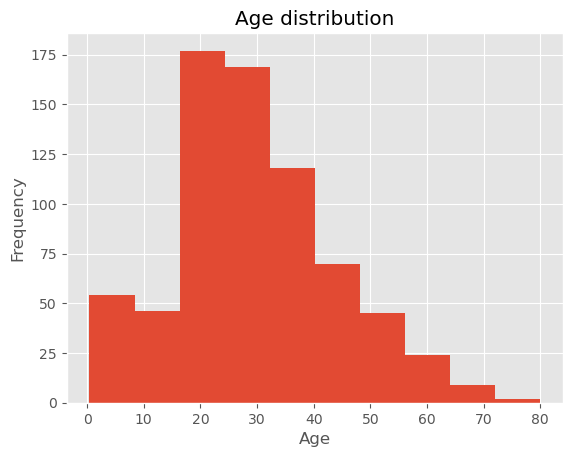

In [49]:
fig, ax = plt.subplots()
ax.hist(data['Age'])
ax.set_xlabel("Age")
ax.set_ylabel("Frequency")
ax.set_title("Age distribution")

Text(0.5, 1.0, 'Sibling distribution')

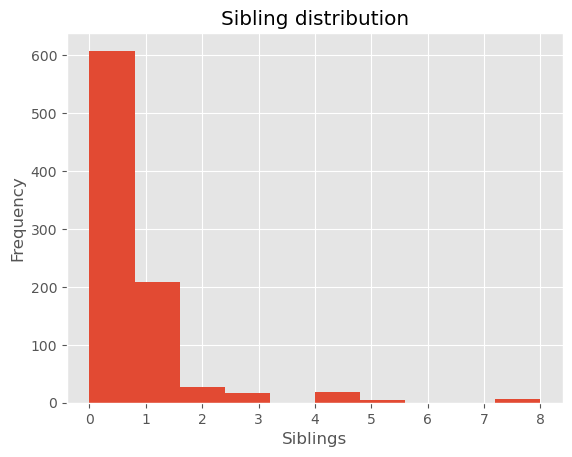

In [50]:
fig, ax = plt.subplots()
ax.hist(data['SibSp'])
ax.set_xlabel("Siblings")
ax.set_ylabel("Frequency")
ax.set_title("Sibling distribution")

Text(0.5, 1.0, 'Parent distribution')

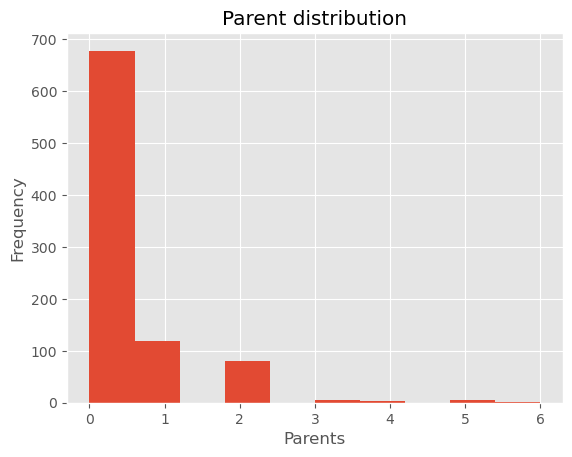

In [51]:
fig, ax = plt.subplots()
ax.hist(data['Parch'])
ax.set_xlabel("Parents")
ax.set_ylabel("Frequency")
ax.set_title("Parent distribution")

Text(0.5, 1.0, 'Ticket price distribution')

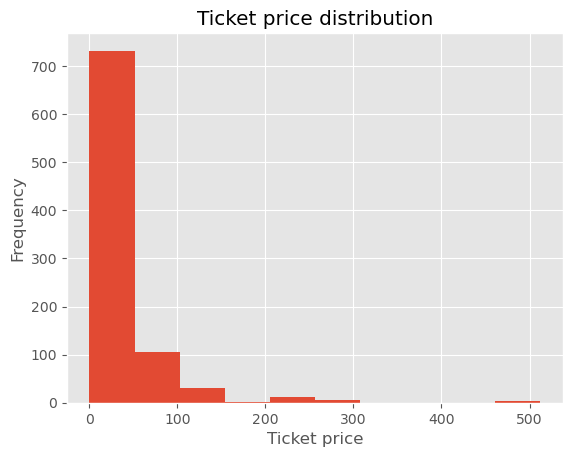

In [52]:
fig, ax = plt.subplots()
ax.hist(data['Fare'])
ax.set_xlabel("Ticket price")
ax.set_ylabel("Frequency")
ax.set_title("Ticket price distribution")

Text(0.5, 1.0, 'Passanger class distribution')

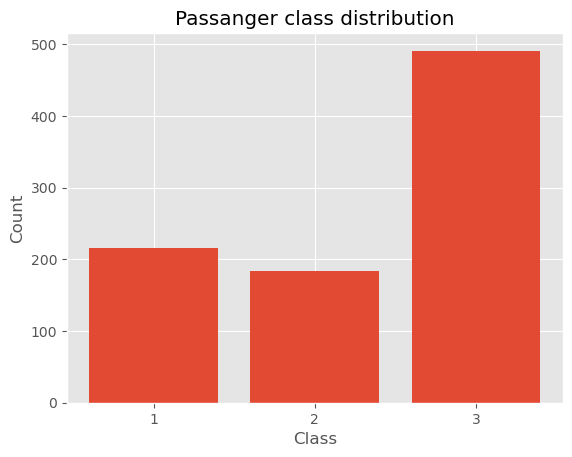

In [53]:
fig, ax = plt.subplots()
ax.bar([1,2,3],data['Pclass'].value_counts().sort_index(), tick_label=[1,2,3])
ax.set_xlabel("Class")
ax.set_ylabel("Count")
ax.set_title("Passanger class distribution")


Text(0.5, 1.0, 'Survival rate')

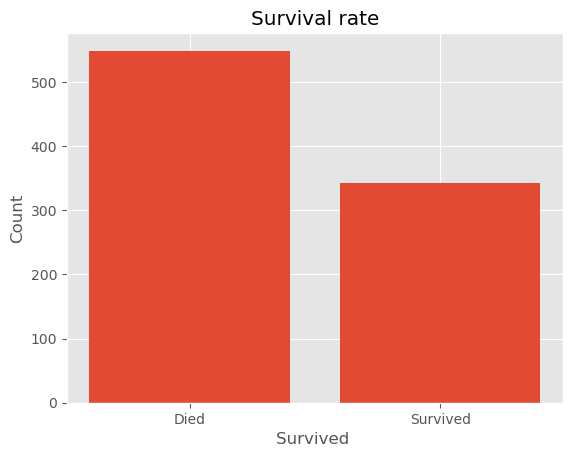

In [54]:
fig, ax = plt.subplots()
ax.bar(['Died','Survived'],data['Survived'].value_counts().sort_index())
ax.set_xlabel("Survived ")
ax.set_ylabel("Count")
ax.set_title("Survival rate")

Text(0.5, 1.0, 'Sex distribution')

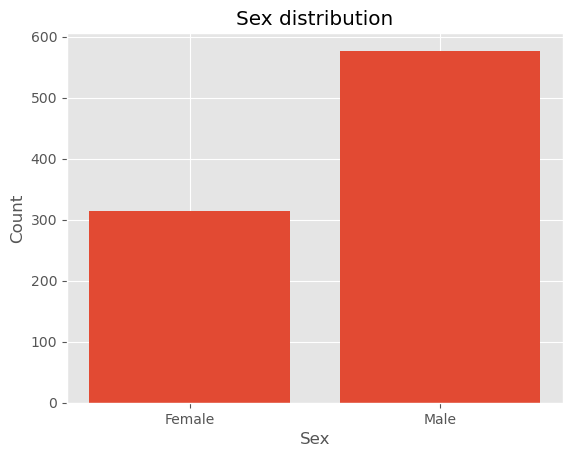

In [55]:
fig, ax = plt.subplots()
ax.bar(['Female','Male'],data['Sex'].value_counts().sort_index())
ax.set_xlabel("Sex")
ax.set_ylabel("Count")
ax.set_title("Sex distribution")

S    644
C    168
Q     77
Name: Embarked, dtype: int64


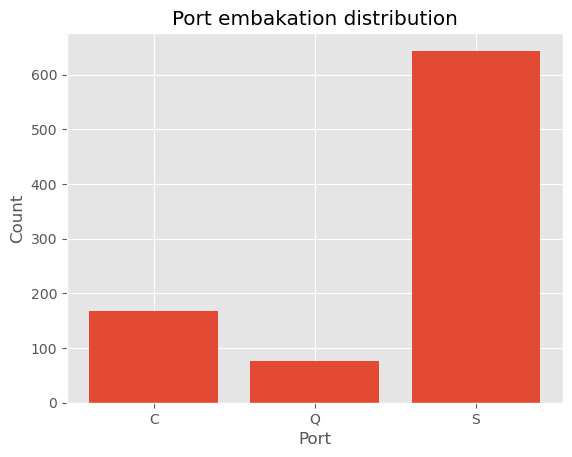

In [59]:
fig, ax = plt.subplots()
ax.bar(['C','Q','S'],data['Embarked'].value_counts().sort_index())
ax.set_xlabel("Port")
ax.set_ylabel("Count")
ax.set_title("Port embakation distribution")

<Axes: >

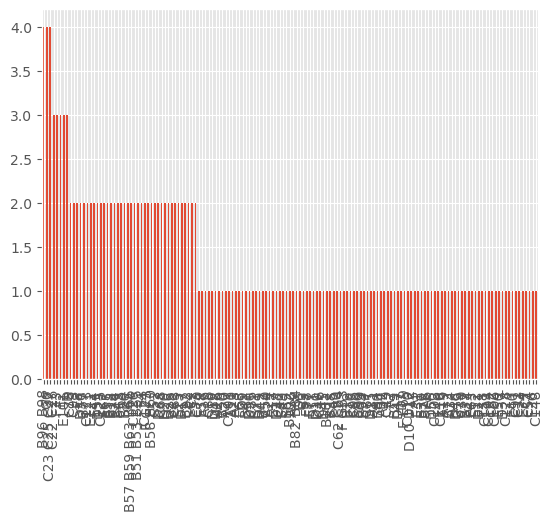

In [70]:
data['Cabin'].value_counts().plot(kind='bar')

<Axes: >

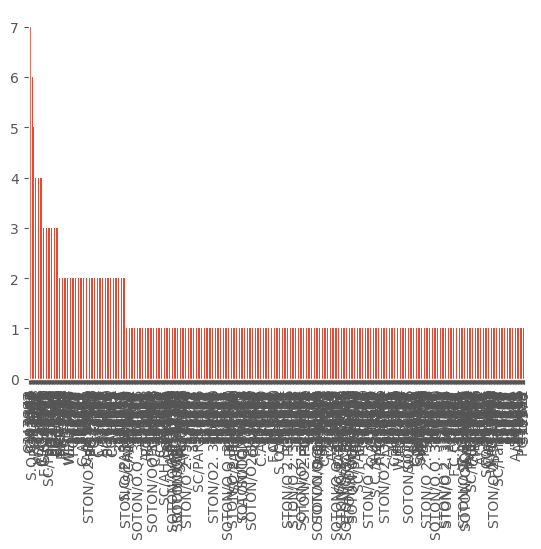

In [71]:
data['Ticket'].value_counts().plot(kind='bar')

## Feature  correlation

In [57]:
# corrolation between numerical data
num_mask = ['Age', 'SibSp','Parch', 'Fare']
corr = data[num_mask].corr()
fig = px.imshow(corr,title='Numerical data correlation')
pio.show(fig)

In [58]:
# Compare survival rate across multiple features (shows average)
pd.pivot_table(data, index='Survived', values=num_mask)

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


In [63]:
# compare survival rate agains non numerical features (ticket does not play any role if we are just counting)
print(pd.pivot_table(data, index='Survived', columns='Pclass', values='Ticket', aggfunc='count'))
print()
print(pd.pivot_table(data, index='Survived', columns='Sex', values='Ticket', aggfunc='count'))
print()
print(pd.pivot_table(data, index='Survived', columns='Embarked', values='Ticket', aggfunc='count'))

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119

Sex       female  male
Survived              
0             81   468
1            233   109

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217


## Assumptions so far
* Port (Embarked) does not sem to play a big role in survival.
* Woman have higher chance of survival
* People from 1 class have higher chance of survival
* Parch and SibSp columns seem o have pretty high correlation.
* age have normal distribution
* SibSp, Parch and fare may need to be scaled/normalized.
* Cabin have a lot of missing data.
* Cabin and Ticket values need to be simplified. (oo many unique values)


## Feature engeneering

## Themes to explore

* Wealthy people have higher chance of survival.
* Women and children have higher chance of survival.